## <center>CO and NOX emmision</center>

#### About this Notebook
my project, three alghorithm for two features : NOX & CO.
I use `MLR` for `CO emmision` and `RF` for `NOX emmision`
and `nonlinear regression for both of them`
- **RF** : Random Forest Regressor
- **MLR** : Multiple Linear Regression
- **nonlinear multiple regression**

## Understanding the Data

### `gt_new.csv`:

- **AT** : Ambient Temperature
- **AP** : Ambient Pressure
- **AH** : Ambient Humidity
- **AFDP** : Air Filter Difference Pressure
- **GTEP** : Gas Turbine Exhaust Pressure
- **TIT** : Turbine Inlet Temperature
- **TAT** : Turbine After Temperature
- **TEY** : Turbine Energy Yield
- **CDP** : Compressor Discharge Pressure
- **CO** : Carbon Monoxide
- **NOX** : Nitrogen Oxides


### needed packages and data read

In [1]:
#import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('gt_2015.csv') #read the csv file
df.describe()s

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


In [2]:
#split data to test and train
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### for `NOX`
#### we use `RF` method for `NOX` emission

Variance score: 0.82


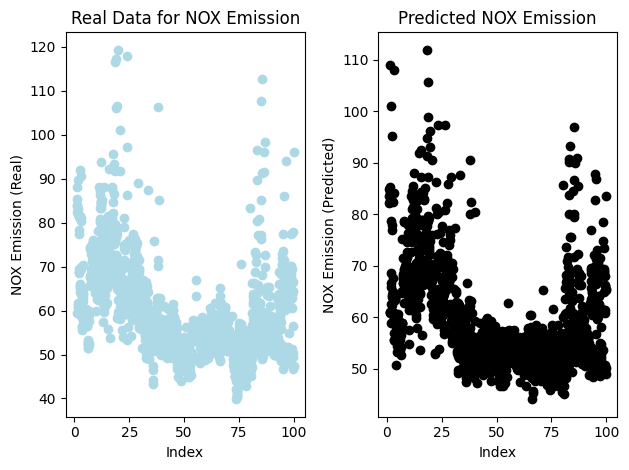

In [3]:
# for avoiding from rewrite
features=['AT','AH','CDP','GTEP']
target=['NOX']

#RF needed packages and defines
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,random_state=10)

# define x and y for fitting
x_train = np.asanyarray(train[features])
y_train = np.asanyarray(train[target])
y_train = np.ravel(y_train)

# unimportant warning 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#fitting
RF=model.fit(x_train,y_train)

#start testing
#x_test=np.asanyarray(test[features])
x_test=test[features]
y_pred= RF.predict(x_test)
y_real = np.asanyarray(test[target])
#..................................................varience(R^2)...........................................

#varience score for prediction:
print('Variance score: %.2f' % RF.score(x_test, y_real))
      
#..................................................plot y_real & y_pred.....................................


# Create x values for real data and predictions
x1 = np.linspace(1, 100, len(y_real))
x2 = np.linspace(1, 100, len(y_pred))

# Scatter plot for real data
plt.subplot(1, 2, 1)
plt.scatter(x1, y_real, color='lightblue')
plt.title('Real Data for NOX Emission')
plt.xlabel('Index')
plt.ylabel('NOX Emission (Real)')

# Scatter plot for predicted data
plt.subplot(1, 2, 2)
plt.scatter(x2, y_pred, color='black')
plt.title('Predicted NOX Emission')
plt.xlabel('Index')
plt.ylabel('NOX Emission (Predicted)')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [16]:
from itertools import permutations
from sklearn import linear_model
from tqdm.auto import tqdm
regr = linear_model.LinearRegression()

features=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target='CO'
perms=permutations(features,4)
for perm in tqdm(list(perms)):
  perm=list(perm)
  x_train=np.asanyarray(train[perm])
  y_train=np.asanyarray(train[target])
  x_test=np.asanyarray(test[perm])
  y_real=np.asanyarray(test[target])
  model=regr.fit(x_train,y_train)
  num=model.score(x_test,y_real)
  if num>0.73:
    print(perm,num)
    

100%|█████████████████████████████████████████████████████████████████████████████| 5040/5040 [00:07<00:00, 681.48it/s]


### for `CO`
#### we use `MLR` method for `CO` emission

Coefficients:  [[ 1.32577299  0.02748834 -0.1896471   0.05923803]]
intercept:  [186.48329487]
Variance score: 0.62


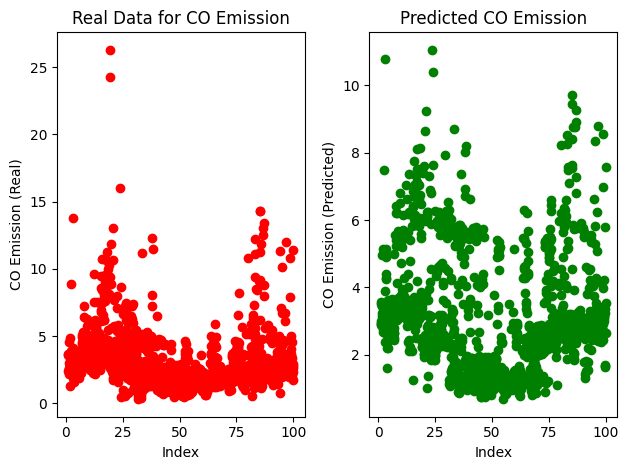

In [17]:
features2=['CDP','TEY','TIT','GTEP']
target2=['CO']

from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[features2])
y = np.asanyarray(train[target2])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

x_train = np.asanyarray(train[features2])
y_train = np.asanyarray(train[target2])

x_test=test[features2]
y_pred= regr.predict(x_test)
y_real = np.asanyarray(test[target2])

#..................................................varience(R^2)...........................................

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_real))

#..................................................plot y_real & y_pred.....................................
#plot for best show and check

# Create x values for real data and predictions
x1 = np.linspace(1, 100, len(y_real))
x2 = np.linspace(1, 100, len(y_pred))

plt.subplot(1, 2, 1)
plt.scatter(x1, y_real, color='red')
plt.title('Real Data for CO Emission')
plt.xlabel('Index')
plt.ylabel('CO Emission (Real)')

# Scatter plot for predicted data
plt.subplot(1, 2, 2)
plt.scatter(x2, y_pred, color='green')
plt.title('Predicted CO Emission')
plt.xlabel('Index')
plt.ylabel('CO Emission (Predicted)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### we use `RF` method for `CO` emission

Variance score: 0.61


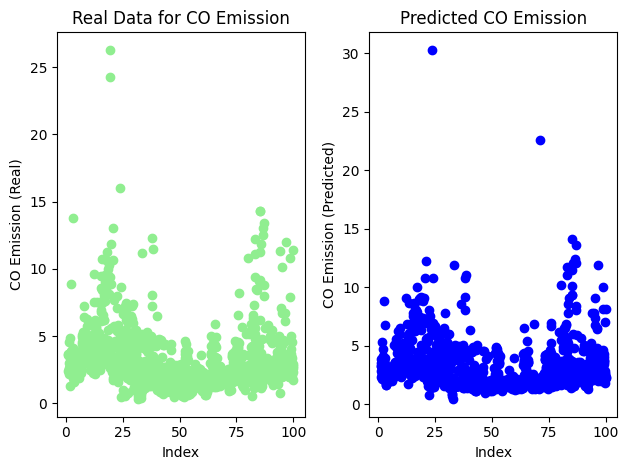

In [18]:
# for avoiding from rewrite
#features3=['CDP','TIT','TEY']
features3=['CDP','TIT','TEY','AH','AT','TAT']
target3=['CO']

#RF needed packages and defines
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,random_state=10)

# define x and y for fitting
x_train = np.asanyarray(train[features3])
y_train = np.asanyarray(train[target3])
y_train = np.ravel(y_train)

# unimportant warning 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#fitting
RF=model.fit(x_train,y_train)

#start testing
x_test=test[features3]
y_pred= RF.predict(x_test)
y_real = np.asanyarray(test[target3])

#..................................................varience(R^2)...........................................

#varience score for prediction:
print('Variance score: %.2f' % RF.score(x_test, y_real))
      
#..................................................plot y_real & y_pred.....................................

# Create x values for real data and predictions
x1 = np.linspace(1, 100, len(y_real))
x2 = np.linspace(1, 100, len(y_pred))

# Scatter plot for real data
plt.subplot(1, 2, 1)
plt.scatter(x1, y_real, color='lightgreen')
plt.title('Real Data for CO Emission')
plt.xlabel('Index')
plt.ylabel('CO Emission (Real)')

# Scatter plot for predicted data
plt.subplot(1, 2, 2)
plt.scatter(x2, y_pred, color='blue')
plt.title('Predicted CO Emission')
plt.xlabel('Index')
plt.ylabel('CO Emission (Predicted)')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### nonlinear regression for both of `CO` and `NOX`

### for `CO`

In [19]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from itertools import permutations 
from tqdm.auto import tqdm

In [20]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

features=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
perms = permutations(features, 4)
# Print the obtained permutations 
target = 'CO'
max_num1 = 0
max_perm1 = None
for perm in tqdm(list(perms)): 
    perm = list(perm)
    x_train = np.asanyarray(train[perm])
    y_train = np.asanyarray(train[target])
    y_train = np.ravel(y_train)
    x_test = test[perm]
    y_real = np.asanyarray(test[target])
    degree = 3
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(x_train, y_train)
    num = model.score(x_test, y_real)
    if max_num1 < num:
        max_num1 = num
        max_perm1 = perm


100%|█████████████████████████████████████████████████████████████████████████████| 5040/5040 [00:34<00:00, 146.00it/s]


In [9]:
print("the variance for CO:" ,max_num1)
print("set of features:" ,max_perm1)

the variance for CO: 0.7456018533859323
set of features: ['GTEP', 'TEY', 'AT', 'TAT']


### for `NOX`

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

features=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
perms = set(permutations(features, 4))
# Print the obtained permutations 
target = 'NOX'
max_num = 0
max_perm = None
for perm in tqdm(list(perms)): 
    perm = list(perm)
    x_train = np.asanyarray(train[perm])
    y_train = np.asanyarray(train[target])
    y_train = np.ravel(y_train)
    x_test = test[perm]
    y_real = np.asanyarray(test[target])
    degree = 3
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(x_train, y_train)
    num = model.score(x_test, y_real)
    if max_num < num:
        max_num = num
        max_perm = perm
x_test=max_perm

100%|█████████████████████████████████████████████████████████████████████████████| 5040/5040 [00:32<00:00, 157.42it/s]


In [11]:
print("the variance for NOX: ", max_num)
print("set of features : " ,max_perm)

the variance for NOX:  0.8515620649867801
set of features :  ['AFDP', 'AH', 'AT', 'TAT']
